In [1]:
import keras

Using TensorFlow backend.
/Users/YINAN/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
cd /Users/YINAN/Documents/Code/Pycharm/Sealion/

/Users/YINAN/Documents/Code/Pycharm/Sealion


In [3]:
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
 
# 4. Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0],28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [5]:
X_train.shape

(60000, 28, 28, 1)

In [6]:
# 6. Preprocess class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [7]:
Y_train.shape

(60000, 10)

In [8]:
# 7. Define model architecture
model = Sequential()
 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
# 7. Define model architecture -- FCN
model2 = Sequential()
 
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(None,None,1)))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(128, (12, 12), activation='relu'))
model2.add(Conv2D(10, (1, 1), activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
# 9. Fit model on training data
model.fit(X_train, Y_train, 
          batch_size=32, epochs=1, verbose=1)



Epoch 1/1
60000/60000 [==============================] - 127s 2ms/step - loss: 0.1184 - acc: 0.9645


In [81]:
model.save('/Users/YINAN/Documents/Code/Github/Thesis/saved/mnist_normal_model.hdf5')

In [18]:
model.layers[4].get_weights()[0].flatten()

array([-0.00158133, -0.00877199, -0.06585586, ..., -0.04759262,
        0.04725115,  0.04433172], dtype=float32)

In [19]:
model2.layers[3].get_weights()[0].flatten()

array([-0.00158133, -0.00877199, -0.06585586, ..., -0.04759262,
        0.04725115,  0.04433172], dtype=float32)

In [13]:
model2.layers[0].set_weights(model.layers[0].get_weights())

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 600,810
Trainable params: 600,810
Non-trainable params: 0
_________________________________________________________________


In [15]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, None, None, 32)    320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 32)    9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, None, None, 32)    0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 128)   589952    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, None, None, 10)    1290      
Total params: 600,810
Trainable params: 600,810
Non-trainable params: 0
_________________________________________________________________


In [16]:
model2.layers[0].set_weights(model.layers[0].get_weights())
model2.layers[1].set_weights(model.layers[1].get_weights())
first = model.layers[4].get_weights()[0].reshape(12,12,32,128)
second = model.layers[4].get_weights()[1]
model2.layers[3].set_weights([first, second])
first = model.layers[5].get_weights()[0].reshape(1,1,128,10)
second = model.layers[5].get_weights()[1]
model2.layers[4].set_weights([first, second])

In [54]:
test1 = X_test[11]
test2 = X_test[11]
test3 = X_test[13]

In [55]:
test = np.concatenate([test1, test2],axis=1)
test = np.concatenate([test, np.zeros((28,56,1))])

In [56]:
test.shape

(56, 56, 1)

In [27]:
from keras import backend as K

inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functor = K.function([inp]+ [K.learning_phase()], outputs ) # evaluation function


In [28]:
def get_layer_output(model, index, test):
    inp = model.input                                           # input placeholder
    outputs = [layer.output for layer in model.layers]          # all layer outputs
    functor = K.function([inp]+ [K.learning_phase()], outputs ) # evaluation function
    layer_outs = functor([test, 1.])
    return layer_outs[index]

In [29]:
get_layer_output(model2, 3, test) == get_layer_output(model, 4, test)

ValueError: Cannot feed value of shape (56, 56, 1) for Tensor 'conv2d_3_input:0', which has shape '(?, ?, ?, 1)'

In [30]:
import numpy as np
from keras.layers import Input, Flatten
from keras.models import Model
inputs = Input(shape=(3,2,4))

# Define a model consisting only of the Flatten operation
prediction = Flatten()(inputs)
m = Model(inputs=inputs, outputs=prediction)

X = np.arange(0,24).reshape(1,3,2,4)
print(X[0][2][0])

[16 17 18 19]


In [31]:
m.predict(X)

array([[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.]], dtype=float32)

In [32]:
x = np.array([[1,2,3], [4,5,6]])

In [33]:
x.shape

(2, 3)

In [34]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage.feature
import pandas as pd
%matplotlib inline

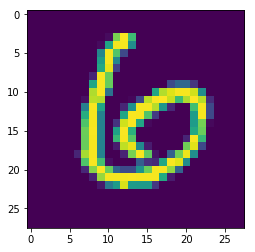

In [78]:
plt.imshow(test1.reshape(28,28))

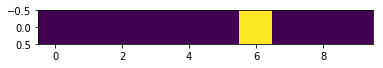

In [79]:
plt.imshow(model.predict(test1.reshape(1,28,28,1)))

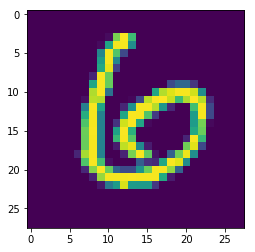

In [59]:
plt.imshow(test2.reshape(28,28))

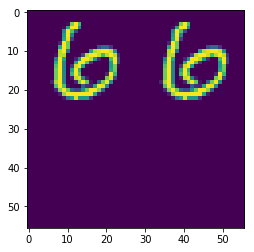

In [60]:
plt.imshow(test.reshape(56,56))

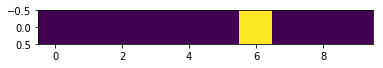

In [80]:
plt.imshow(model.predict(test2.reshape(1,28,28,1)))

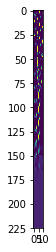

In [62]:
plt.imshow(model2.predict(test.reshape(1,56,56,1)).reshape(225,10))

In [63]:
res = model2.predict(test.reshape(1,56,56,1))

In [64]:
res = res.reshape(15,15,10)

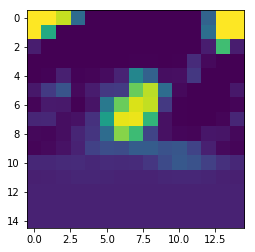

In [85]:
for i in range(7):
    plt.imshow(res[:,:,i])
    

In [70]:
res[:,:,7].shape

(15, 15)